In [1]:
from google.colab import drive

import torch
import matplotlib as plt
import seaborn as sns
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# mount the google drive path to access data
drive.mount("/content/benefit-hackathon")

Drive already mounted at /content/benefit-hackathon; to attempt to forcibly remount, call drive.mount("/content/benefit-hackathon", force_remount=True).


In [2]:
# Loading the data into pandas data frame
data = pd.read_csv('/content/benefit-hackathon/MyDrive/benefit-hackathon/anz_data.csv')


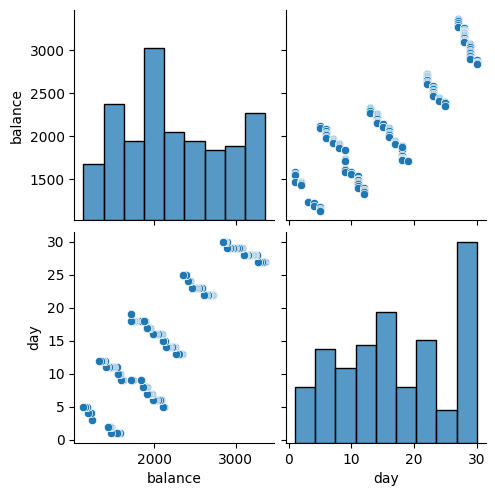

In [3]:
# Choosing the data I want from imported dataset
colsToUse = ['balance', 'day']
TrainingData = data.loc[data['month'] == 8, colsToUse] # Only the month of august (HARD CODED) because no live data is available
TestingData = data.loc[data['month'] == 9, colsToUse]

# Preprocessing the data such that only numeric values are there and not containing of missing values.
TrainingData = TrainingData.apply(pd.to_numeric, errors='coerce')
TrainingData = TrainingData.dropna()

TestingData = TestingData.apply(pd.to_numeric, errors='coerce')
TestingData = TestingData.dropna()
# TrainingData
#
sns.pairplot(TestingData)

In [4]:
# Creating a custom class of type dataset
class CustomDataset(Dataset):
  def __init__(self, data):
    self.data = data

  def __len__(self):
    return len(self.data)

  # This returns an item/items value(s) at a given index location (iloc) in the form of a PyTorch Tensor
  def __getitem__(self, index):
    sample = torch.tensor(self.data.iloc[index].values, dtype=torch.float)
    return sample

In [5]:
# Creating an instance
myDataset = CustomDataset(TrainingData)

batch_size = 32
train_dataloader = DataLoader(myDataset, batch_size = batch_size, shuffle=False)
# for batch in train_dataloader:
#   print(batch)
for x in train_dataloader:
  print(f"Shape of x[N, C]: {x.shape}")
  break

Shape of x[N, C]: torch.Size([32, 2])


The expected shape of above torch should be 32 batch size and a 2 dimensional tensor.

In [6]:
# Defining a linear regression model
class LinearRegression(nn.Module):
  def __init__(self, inputSize):
    super(LinearRegression, self).__init__() # super(..).__init__ calls the constructor of the parent class to properly initialize the LR class
    self.linear = nn.Linear(inputSize, 1) # the parameters are just basically (input_size, output_size)

  # defining the model's forward propogation of the neural network
  def forward(self, x):
    return self.linear(x)

In [7]:
# Defining model, loss and optimizer
model = LinearRegression(inputSize=1) # just using the day since it will be by month

# Optimizing using Stochastic Gradient Descent, with weights of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
num_epochs = 100
criterion = nn.MSELoss()
for epoch in range(num_epochs):
    for data in train_dataloader:
        inputs = data[:, 1].unsqueeze(1).float()  # 'day' column
        targets = data[:, 0].unsqueeze(1).float()   # 'balance' column
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    inputs = torch.tensor(TestingData['day'].values.reshape(-1, 1), dtype=torch.float)
    predicted_balances = model(inputs)

# Observe the direction of balance change
direction_of_change = "increasing" if predicted_balances[-1] > predicted_balances[0] else "decreasing"
print(f"Predicted direction of balance change: {direction_of_change}")

Predicted direction of balance change: decreasing


In [8]:
# validateData  = data.loc[data['month'] == 10, colsToUse]
